<a href="https://colab.research.google.com/github/ashu2345/Vital-Statistics/blob/master/Vital_Statistics_Suicide_Deaths_by_Age_Group%2C_Race_Ethnicity%2C_Resident_County%2C_Region_and_Gender_Beginning_2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data taken from <a href="https://data.world/healthdatany/j6fz-a4ta">data.world</a>

In [0]:
import pandas as pd
import numpy as np
import datadotworld as dw
results = dw.query(
	'healthdatany/j6fz-a4ta', 
    'SELECT * FROM vital_statistics_suicide_deaths_by_age_group_race_ethnicity_resident_county_region_and_gender_beginn_1')
results_df = results.dataframe

In [141]:
results_df.head()

,year,region,race_or_ethnicity,sex,age_group,firearm_deaths,alcohol_related_deaths,suicide_deaths
0,2016,ROS,White Non Hispanic,F,Total,40,746,202
1,2016,NYC,Other Non Hispanic,F,Total,0,27,30
2,2016,NYC,Black Non Hispanic,F,55-64,1,68,4
3,2016,ROS,Hispanic,M,1-9,0,0,0
4,2010,ROS,Black Non Hispanic,F,85+,0,0,0


In [142]:
results_df['year'].value_counts()

2016    239
2015    237
2003    136
2004    134
2014    114
2005    113
2006    112
2011    111
2008    109
2007    108
2010    107
2009    107
2013    106
2012    104
Name: year, dtype: int64

In [0]:
pd.DataFrame.sort_values?

In [0]:
results_df = results_df.sort_values(by='year')

In [145]:
results_df.head()

,year,region,race_or_ethnicity,sex,age_group,firearm_deaths,alcohol_related_deaths,suicide_deaths
918,2003,NYC,Black Non Hispanic,F,Total,0,0,1
807,2003,ROS,Other Non Hispanic,F,75-84,0,0,0
808,2003,ROS,Other Non Hispanic,M,65-74,0,0,0
809,2003,ROS,Other Non Hispanic,F,65-74,0,0,0
810,2003,ROS,Other Non Hispanic,F,55-64,0,0,0


In [146]:
results_df['age_group'].value_counts()

Total    242
75-84    190
85+      185
65-74    185
55-64    173
45-54    164
35-44    143
<1       133
25-34    126
20-24    101
10-19     99
1-9       96
Name: age_group, dtype: int64

In [147]:
results_df['race_or_ethnicity'].value_counts()

Hispanic              672
White Non Hispanic    371
Black Non Hispanic    336
Not Stated            296
Other Non Hispanic    162
Name: race_or_ethnicity, dtype: int64

In [148]:
results_df.groupby(['race_or_ethnicity','year']).describe()

alcohol_related_deaths                               \
                                         count        mean         std  min   
race_or_ethnicity  year                                                       
Black Non Hispanic 2003                   33.0    0.181818    0.583874  0.0   
                   2004                   22.0    0.272727    0.702500  0.0   
                   2005                   17.0    0.352941    0.606339  0.0   
                   2006                   18.0    0.000000    0.000000  0.0   
                   2007                   18.0    0.111111    0.323381  0.0   
                   2008                   22.0    0.090909    0.294245  0.0   
                   2009                   20.0    0.300000    0.470162  0.0   
                   2010                   23.0    0.086957    0.288104  0.0   
                   2011                   20.0    0.000000    0.000000  0.0   
                   2012                   16.0    0.250000    0.447214  0.0   
                   2013                   13.0    0.307692    0.630425  0.0   
                   2014                   18.0    0.000000    0.000000  0.0   
                   2015                   48.0   29.458333   60.026930  0.0   
                   2016                   48.0   29.250000   57.313435  0.0   
Hispanic           2003                   48.0  156.541667  288.837211  0.0   
                   2004                   48.0  150.958333  274.117226  0.0   
                   2005                   48.0  148.958333  278.430553  0.0   
                   2006                   48.0  147.625000  274.648838  0.0   
                   2007                   48.0  149.666667  277.570028  0.0   
                   2008                   48.0  158.375000  293.005891  0.0   
                   2009                   48.0  159.916667  298.844429  0.0   
                   2010                   48.0  161.041667  301.716434  0.0   
                   2011                   48.0  170.166667  313.856000  0.0   
                   2012                   48.0  179.125000  333.302854  0.0   
                   2013                   48.0  188.916667  349.501641  0.0   
                   2014                   48.0  189.791667  353.244292  0.0   
                   2015                   48.0   35.208333   82.766516  0.0   
                   2016                   48.0   36.791667   82.128586  0.0   
Not Stated         2003                   17.0    0.117647    0.332106  0.0   
                   2004                   20.0    0.200000    0.523148  0.0   
...                                        ...         ...         ...  ...   
                   2014                   23.0    0.782609    1.594209  0.0   
                   2015                   45.0    3.733333    8.125157  0.0   
                   2016                   47.0    3.446809    7.540639  0.0   
Other Non Hispanic 2003                   10.0    0.000000    0.000000  0.0   
                   2004                   11.0    0.000000    0.000000  0.0   
                   2005                   12.0    0.000000    0.000000  0.0   
                   2006                    6.0    0.000000    0.000000  0.0   
                   2007                    6.0    0.000000    0.000000  0.0   
                   2008                    2.0    0.000000    0.000000  0.0   
                   2009                    4.0    0.500000    0.577350  0.0   
                   2011                    4.0    0.000000    0.000000  0.0   
                   2012                    3.0    0.000000    0.000000  0.0   
                   2013                    4.0    0.000000    0.000000  0.0   
                   2014                    4.0    0.000000    0.000000  0.0   
                   2015                   48.0    6.208333   13.022008  0.0   
                   2016                   48.0    6.541667   13.506434  0.0   
White Non Hispanic 2003                   28.0    0.928571    1.783226  0.

# Number of deaths by category from 2003 to 2016

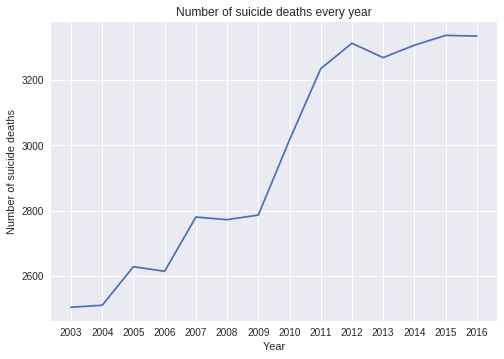

In [149]:
results_df.groupby(['year'])['suicide_deaths'].sum().plot.line()
plt.xlabel("Year")
plt.ylabel("Number of suicide deaths")
plt.title("Number of suicide deaths every year")
plt.xticks(range(2003,2017))
plt.show()

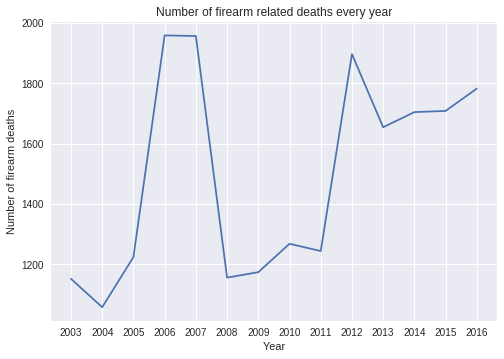

In [150]:
results_df.groupby(['year'])['firearm_deaths'].sum().plot.line()
plt.xlabel("Year")
plt.ylabel("Number of firearm deaths")
plt.title("Number of firearm related deaths every year")
plt.xticks(range(2003,2017))
plt.show()

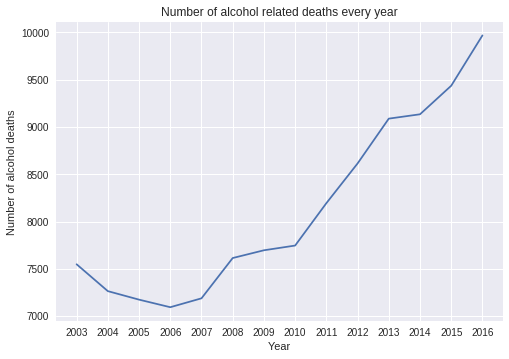

In [151]:
results_df.groupby(['year'])['alcohol_related_deaths'].sum().plot.line()
plt.xlabel("Year")
plt.ylabel("Number of alcohol deaths")
plt.title("Number of alcohol related deaths every year")
plt.xticks(range(2003,2017))
plt.show()

# Number of deaths across respective age groups

Text(0.5, 1.0, 'Suicide deaths across various age groups')

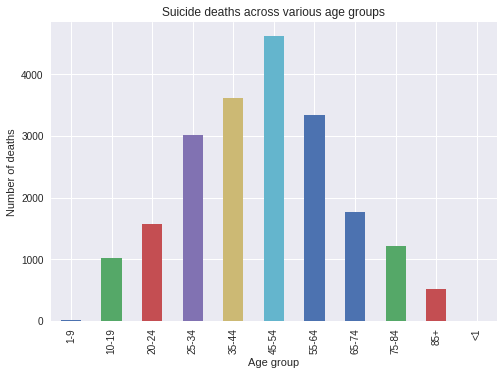

In [152]:
results_df.loc[results_df['age_group'] != 'Total'].groupby(['age_group'])['suicide_deaths'].sum().plot.bar()
plt.xlabel('Age group')
plt.ylabel("Number of deaths")
plt.title("Suicide deaths across various age groups")

Text(0.5, 1.0, 'Firearm related deaths across various age groups')

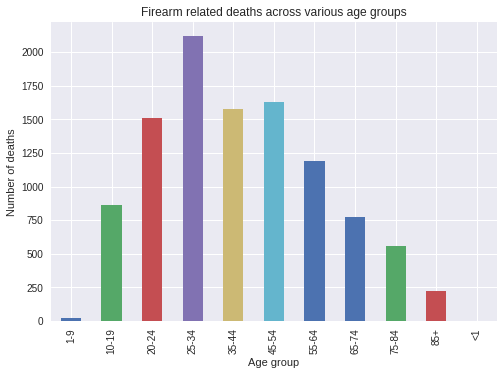

In [153]:
results_df.loc[results_df['age_group'] != 'Total'].groupby(['age_group'])['firearm_deaths'].sum().plot.bar()
plt.xlabel('Age group')
plt.ylabel("Number of deaths")
plt.title("Firearm related deaths across various age groups")

Text(0.5, 1.0, 'Alcohol related deaths across various age groups')

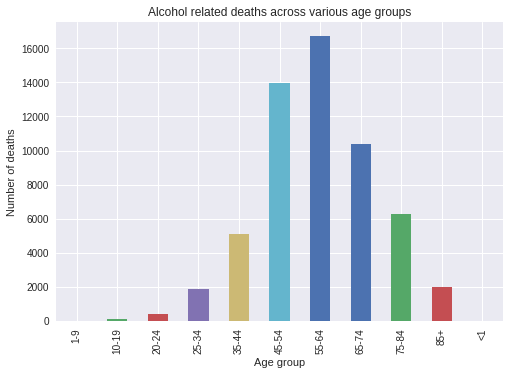

In [154]:
results_df.loc[results_df['age_group'] != 'Total'].groupby(['age_group'])['alcohol_related_deaths'].sum().plot.bar()
plt.xlabel('Age group')
plt.ylabel("Number of deaths")
plt.title("Alcohol related deaths across various age groups")

# Number of deaths by region

In [155]:
results_df['region'].value_counts()

ROS    1096
NYC     741
Name: region, dtype: int64

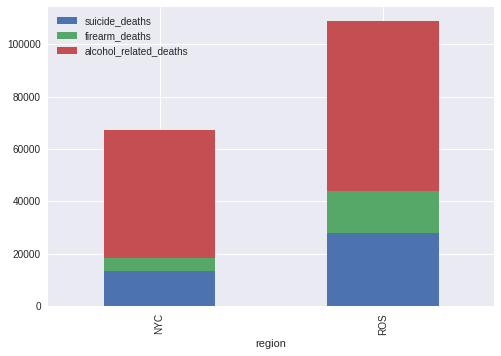

In [156]:
results_df.groupby('region')['suicide_deaths','firearm_deaths','alcohol_related_deaths'].sum().plot.bar(stacked=True)

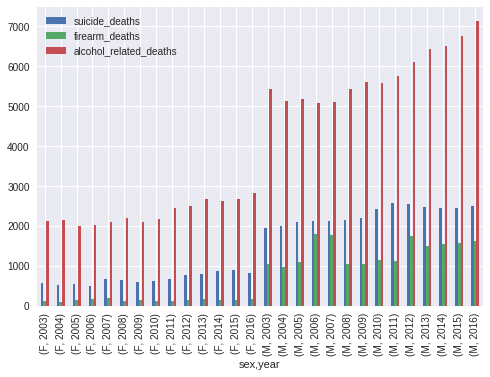

In [157]:
results_df.groupby(['sex','year'])['suicide_deaths','firearm_deaths','alcohol_related_deaths'].sum().plot.bar()